In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab



In [2]:
df = pd.read_csv('desktop/mdst_workshops/workshop3/HospitalAdmissionsData.csv')
headers = np.array(df.columns)

def printArray (headers):
    for i in headers:
        print(i)
        
#What are the column headers or features in this data set?
print("The column headers of this data set are: ",)        
printArray(headers)



The column headers of this data set are: 
ID
AdmissionLengthDays
Death_1
Admission_Type
Insurance_Type
EnglishLanguage_1
Religion_Type
Married_1
Race
Dx


In [3]:
types = df.dtypes
#How many features are floats? How many are integers?

numFloat = 0
numInt = 0
numObject = 0

for i in types:
    if i == np.int64:
        numInt = numInt + 1
        
    if i == np.float64:
        numFloat = numFloat + 1
        
    if i == np.object:
        numObject = numObject + 1
        

print('There are', numFloat, 'floats', numInt, 'ints, and', numObject, 'objects')

There are 1 floats 4 ints, and 5 objects


In [4]:
#Which features are objects (non-numeric variables)?
df.info()

#Objects are: Admission_Type, Insurance_Type, Religion_Type, Race, Dx
print("Objects are: Admission_Type, Insurance_Type, Religion_Type, Race, Dx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB
Objects are: Admission_Type, Insurance_Type, Religion_Type, Race, Dx


In [5]:
#What are the possible 'values' for insurance type?
insuranceTypeValues = df['Insurance_Type'].unique()
print(insuranceTypeValues)

['private' 'medicare' 'government' 'medicaid' 'self pay']


In [6]:
#Show the summary statistics for the admission length.
summaryStats = df['AdmissionLengthDays'].describe()
print(summaryStats)

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64


In [7]:
#What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
max_admit_type = df['Admission_Type'].mode()[0];
max_insur_type = df['Insurance_Type'].mode()[0];
max_rel_type = df['Religion_Type'].mode()[0];
max_race = df['Race'].mode()[0];
max_diag = df['Dx'].mode()[0];

print('The most common admission type is', max_admit_type)
print('The most common insurance type is', max_insur_type)
print('The most common religious type is', max_rel_type)
print('The most common racial type is', max_race)
print('The most common diagnosis type is', max_diag)


The most common admission type is emergency
The most common insurance type is medicare
The most common religious type is catholic
The most common racial type is white
The most common diagnosis type is newborn


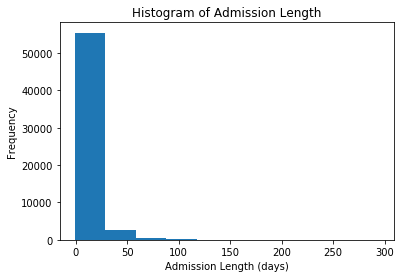

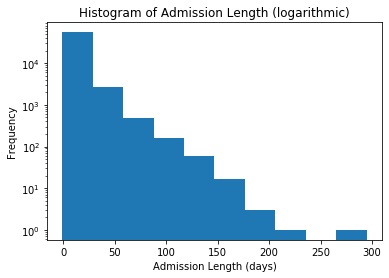

These two histograms show us that every 50ish days they accept 1/10 as many people as) 
they accepted the 50 days prior. The data is quite linear when examined logarithmically


In [8]:
#Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.
admit_days = df['AdmissionLengthDays']

plt.hist(admit_days)
plt.xlabel('Admission Length (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Admission Length')
plt.show()

plt.hist(admit_days)
plt.xlabel('Admission Length (days)')
plt.ylabel('Frequency')
plt2=plt.yscale('log', nonposy='clip')
plt.title('Histogram of Admission Length (logarithmic)')
plt.show()

print("""These two histograms show us that every 50ish days they accept 1/10 as many people as) 
they accepted the 50 days prior. The data is quite linear when examined logarithmically""")


Average length of admission for those who died: 10.12961
Average length of admission for those who did not die: 10.14001
Average length of admission: 0    10.138978
dtype: float64


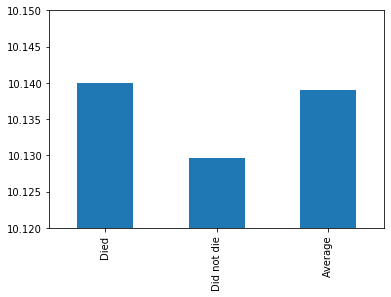

In [81]:
#Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.
avgLength = df.groupby('Death_1').mean()['AdmissionLengthDays'];

frame = df.groupby('Death_1')['AdmissionLengthDays'];

avgTotal = df['AdmissionLengthDays'].mean();
avgTotal = pd.Series(avgTotal);


avgLength = avgLength.append(avgTotal);
avgLength.index = ('Died','Did not die','Average');
avgLength.plot.bar();

plt.ylim([10.12, 10.15]);



print('Average length of admission for those who died:', round(avgLength[1],5));
print('Average length of admission for those who did not die:',round(avgLength[0],5));
print('Average length of admission:', avgTotal);
plt.show();





In [98]:
#Describe the association between death and insurance type and show a visualization or test.
DeathInsuranceRatio = df['Death_1'].value_counts('Insurance_Type')

from scipy import stats
crossTab = pd.crosstab(df.Death_1, df.Insurance_Type)
chi= stats.chi2_contingency(crossTab)

print('The linear association between death and insuranceis equal to', round(DeathInsuranceRatio[0],3))
print('The chi squared test produced the following output:', chi)
print('In this case, the p-value (',chi[1],') is extremely close to 0 which allows us to reject the null hypothesis (which states that there is no association between the two variables).')

The linear association between death and insuranceis equal to 0.901
The chi squared test produced the following output: (990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))
In this case, the p-value ( 3.425615316200906e-213 ) is extremely close to 0 which allows us to reject the null hypothesis (which states that there is no association between the two variables).
